### Solves the 1D Poisson's equation with Robin boundary conditions

In [1]:
import numpy as np
from scipy.sparse.linalg import spsolve

In [2]:
from core import *

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Domain's limits
west = 0
east = 1

k = 6  # Operator's order of accuracy
m = 2*k + 1  # Minimum number of cells to attain the desired accuracy
dx = (east - west) / m  # Step length

# 1D Mimetic laplacian operator
L = lap(k, m, dx)

# Impose Robin BC on laplacian operator
a = 1.
b = 1.
L = L + robinBC(k, m, dx, a, b)

# 1D Staggered grid
grid = np.append(np.insert(np.arange(west+dx/2, east, dx), 0, west), east)

# RHS
U = np.exp(grid)
U[0] = 0  #  West BC
U[-1] = 2 * np.exp(1)  #  East BC

# Solve a linear system of equations
U = spsolve(L, U) # L\U

/Users/nutrik/Documents/Science/scodes/Python/mole/core/div.py:51: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  D[i, j:j+k] = coeffs
/Users/nutrik/Documents/Science/scodes/Python/mole/core/div.py:70: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  A[i, 0:q] = coeffs
/Users/nutrik/Documents/Science/scodes/Python/mole/core/div.py:76: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  D[1:p+1, 0:q] = A
/Users/nutrik/Documents/Science/scodes/Python/mole/core/div.py:92: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  D[n_rows-p-1:n_rows-1, n_cols-q:n_cols] = A
/Users/nutrik/Documents/Science/scodes/Python/mole/core/grad.py:51: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive.

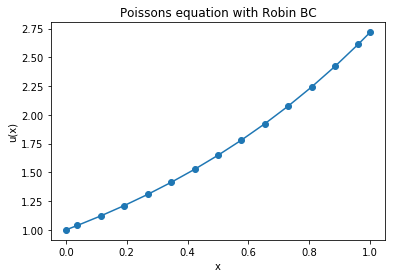

In [5]:
# Plot result
plt.plot(grid, U, 'o-')
plt.title('Poisson''s equation with Robin BC')
plt.xlabel('x')
plt.ylabel('u(x)');